# Demonstration - Filter and noise basics

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage

%matplotlib inline

## Creating noise images with different distributions

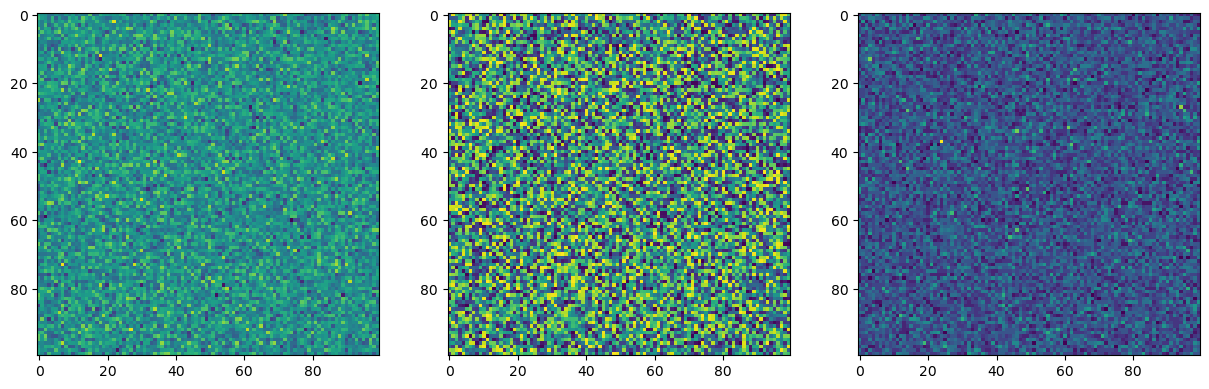

In [10]:
nimg = np.random.normal(0,1,size=[100,100])
uimg = np.random.uniform(-1,1,size=[100,100])
pimg = np.random.poisson(5,size=[100,100])

plt.figure(figsize=[15,8])

plt.subplot(1,3,1)
plt.imshow(nimg)

plt.subplot(1,3,2)
plt.imshow(uimg)

plt.subplot(1,3,3)
plt.imshow(pimg)

## Applying different filters

Text(0.5, 1.0, 'Convolve (binomial)')

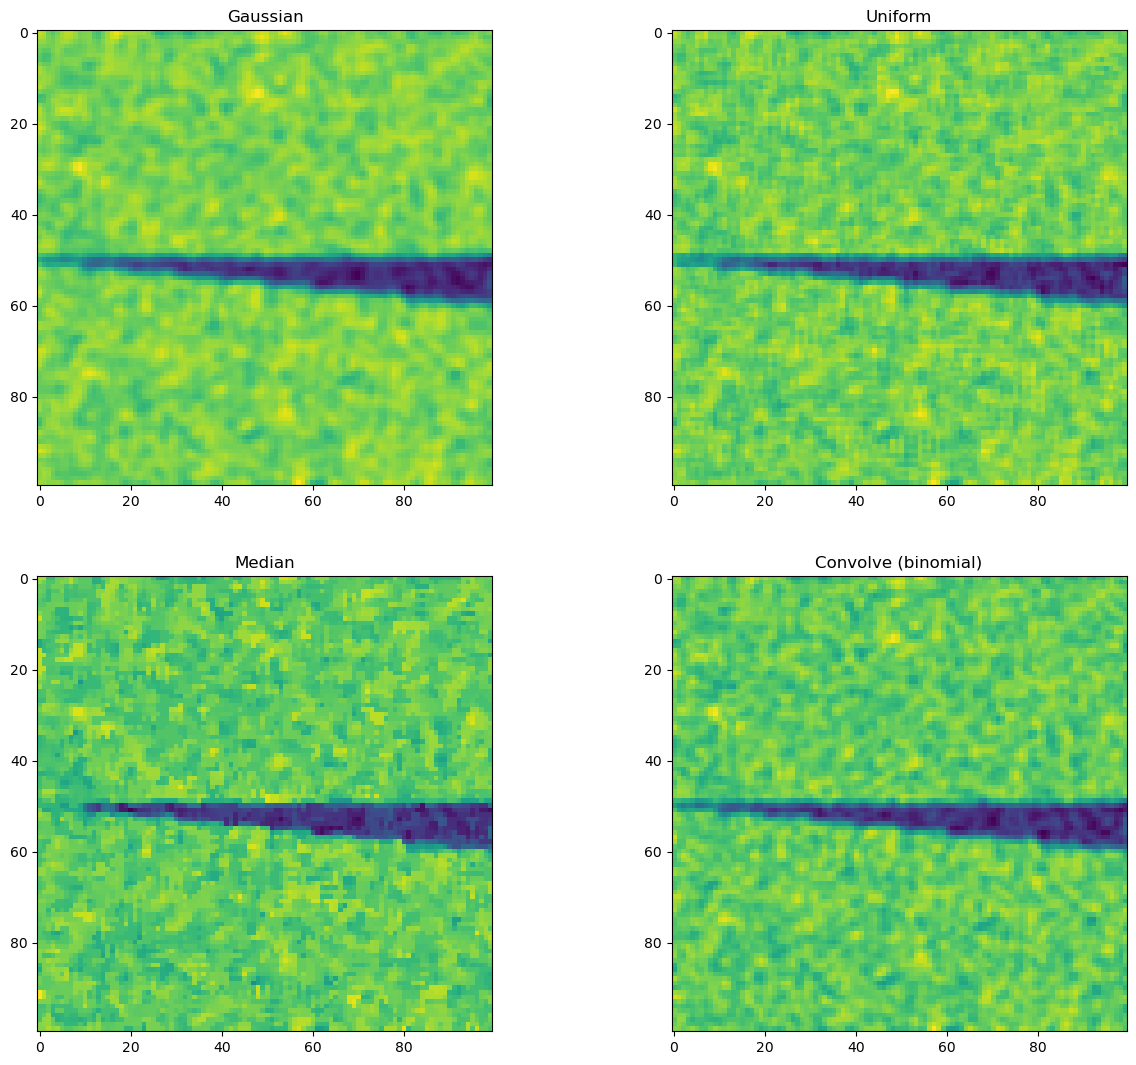

In [19]:
gimg=ndimage.filters.gaussian_filter(nimg,1.0)
fimg=ndimage.filters.uniform_filter(nimg,3)
mimg=ndimage.filters.median_filter(nimg,3)
aimg=ndimage.filters.convolve(nimg,[[1,2,1],[2,4,2],[1,2,1]])

plt.figure(figsize=[15,13])
plt.subplot(2,2,1)
plt.imshow(gimg)
plt.title('Gaussian')

plt.subplot(2,2,2)
plt.imshow(fimg)
plt.title('Uniform')

plt.subplot(2,2,3)
plt.imshow(mimg)
plt.title('Median')

plt.subplot(2,2,4)
plt.imshow(aimg)
plt.title('Convolve (binomial)')

# Demonstrating edge blurring
We want to observe what happens with edges when the image is filtered using different filter kernels.

## Make test data
The test data is a wedge structure with increasing gap width.

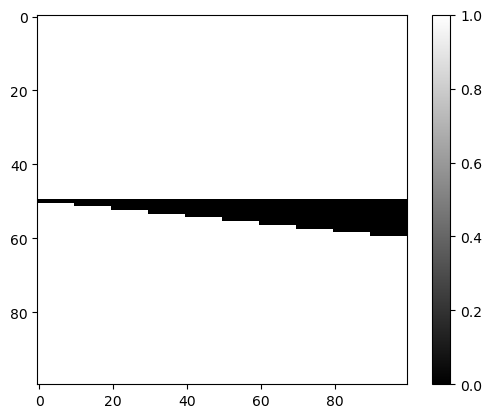

In [12]:
img=np.zeros([100,100])
img[0:50,:]=1
for i in range(img.shape[0]) :
    img[(51+int(i/10)):img.shape[0],i]=1
    
plt.imshow(img,cmap='gray')
plt.colorbar()

## Evaluate under different conditions
 - Add noise of different strength
 - Apply different uniform filter kernels
 - Observe what happens on thresholded data

## Make noisy image

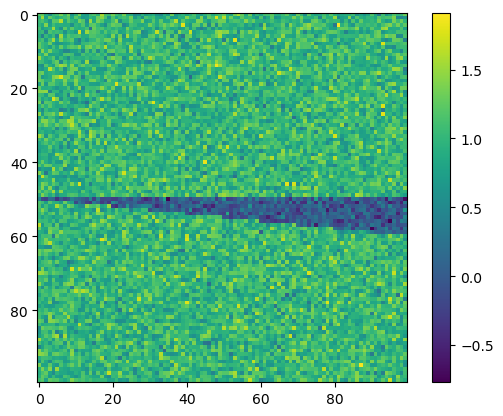

In [13]:
SNR=4
sigma=1/SNR 

noise=np.random.normal(0,sigma,img.shape)
nimg=img+noise
plt.imshow(nimg)
plt.colorbar()

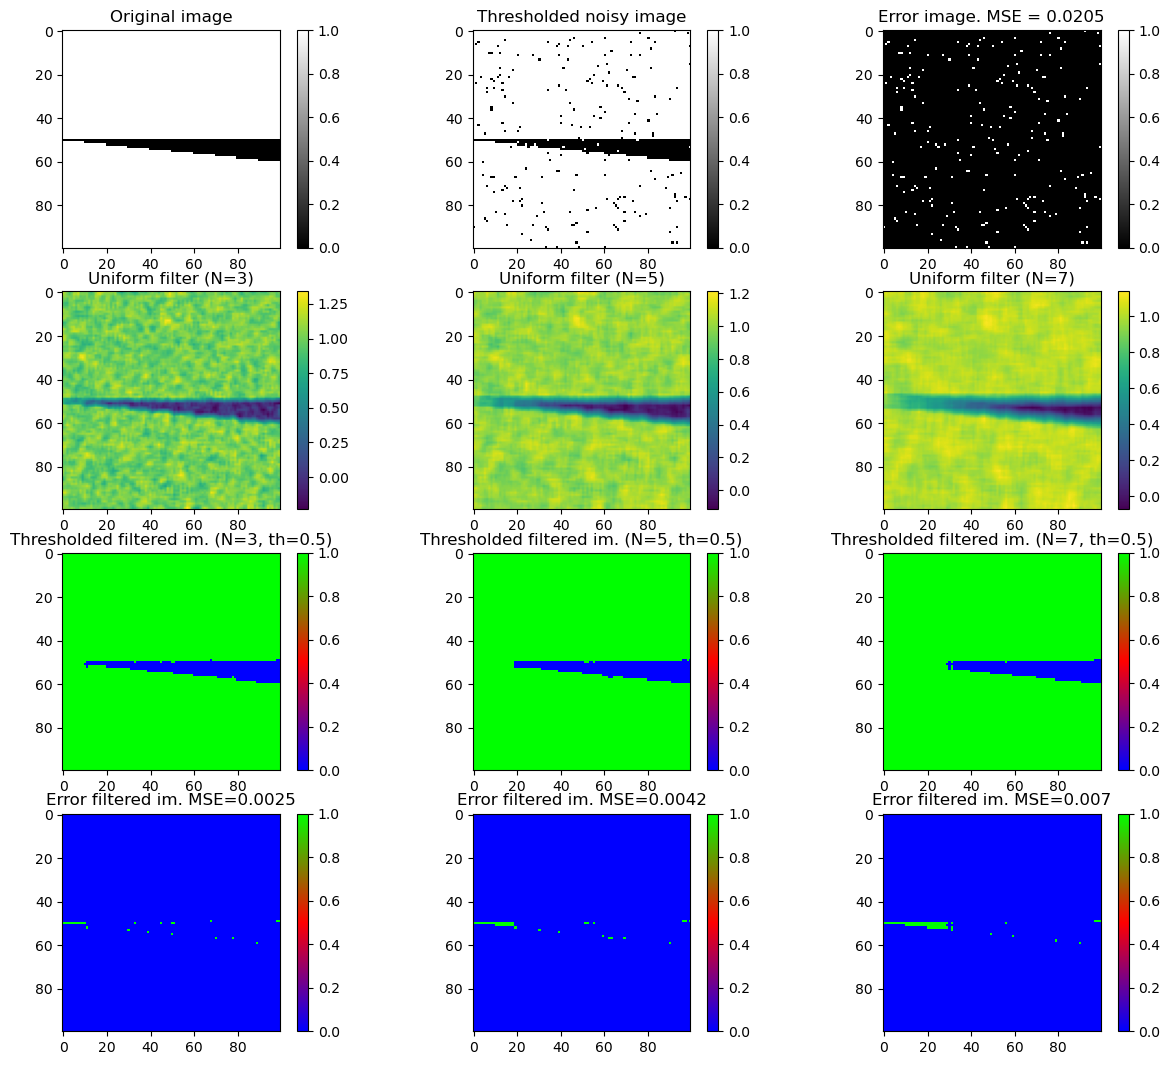

In [14]:
threshold = 0.5 # Threshold for segmentation

fig=plt.figure(figsize=[15,13])
for i in range(3) :
    if (i==0):
        plt.subplot(4,3,i+1)
        plt.imshow(img, cmap='gray', interpolation='none')
        plt.colorbar()
        plt.title('Original image')
    if (i==1) :
        plt.subplot(4,3,i+1)
        plt.imshow(threshold<nimg, cmap='gray', interpolation='none')
        plt.colorbar()
        plt.title('Thresholded noisy image')
    if (i==2) :
        error_image = (img - (threshold<nimg))**2
        plt.subplot(4,3,i+1)
        plt.imshow(error_image, cmap='gray', interpolation='none')
        plt.colorbar()
        plt.title(f'Error image. MSE = {np.mean(error_image)}')
    
    plt.subplot(4,3,3+i+1)
    N=3+i*2
    fimg=ndimage.filters.uniform_filter(nimg,N)
    plt.imshow(fimg)
    plt.colorbar()
    plt.title(f'Uniform filter (N={N})')

    plt.subplot(4,3,6+i+1)
    plt.imshow((threshold<fimg),cmap='brg',interpolation='none')
    plt.colorbar()
    plt.title(f'Thresholded filtered im. (N={N}, th={threshold})')

    error_image = (img - (threshold<fimg))**2
    plt.subplot(4,3,9+i+1)
    plt.imshow(error_image,cmap='brg',interpolation='none')
    plt.colorbar()
    plt.title(f'Error filtered im. MSE={np.mean(error_image)}')

The effect of the filter is as you can see that the SNR is improving but at the cost of lost details